## 1 描述统计

### 1.1 连续变量
**集中趋势**  
* 均值  
    适用于**单峰和基本对称数据**的集中趋势度量，它不适用于**严重偏态**分布的数据。由于考虑了所有信息，均值的抗异常性最好。
* 中位数  
    由于中位数只考虑居中位置，对信息的利用不充分，所以只有当**均值不能使用的情况下**才会用中位数加以描述
* 其他  
    几何平均数：当数据本身是比率时使用几何平均数（G=lg<sup>-1</sup>(∑X/n)）  
    截尾平均数：由于均值易受极端值影响所以一般考虑去掉两端数据再计算，通常两端各去掉5%的数据  
    众数：频率最大的数，一般很少使用  
    
**离散程度**  
* 全距  
    一般只适用于预备性检查  
* 方差和标准差  
    总体方差：σ<sup>2</sup>=Σ(X-μ)<sup>2</sup>/n  
    样本方差：s<sup>2</sup>=Σ(X-$\bar x$)<sup>2</sup>/n-1   
    方差和标准差适用于正态分布数据，当数据有**明显的极端值**时不宜使用。  
* 分位数
    四分距既排除了极端值的影响，有反映了较多数据的离散程度，当方差和标准差不宜使用时能较好地描述离散程度
* 变异系数
    当需要比较两组数据的离散程度时可以使用变异系数来度量，CV=S/$\bar X$

**分布特征**
* 峰度(K)
    K=0：标准正态分布    
    K<0：分布不足  
    K>0：分布过度  
* 偏度(SK) 
    |SK|>1：高度偏态  
    0.5<|SK|<1：中等偏态  
    |SK|<0.5：低等偏态  

### 1.2 离散变量
**集中趋势**
* 众数

**离散程度**
* 异众比率

In [970]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [982]:
data = DataFrame(np.random.randint(0, 10, (4, 5)), columns=list('ABCDE'))
data

,A,B,C,D,E
0,4,8,9,8,3
1,8,0,2,8,6
2,0,8,9,2,2
3,8,6,6,3,3


In [989]:
# 描述统计
data.T.describe()

,0,1,2,3
count,5.000000,5.00000,5.000000,5.000000
mean,6.400000,4.80000,4.200000,5.200000
std,2.701851,3.63318,4.024922,2.167948
min,3.000000,0.00000,0.000000,3.000000
25%,4.000000,2.00000,2.000000,3.000000
50%,8.000000,6.00000,2.000000,6.000000
75%,8.000000,8.00000,8.000000,6.000000
max,9.000000,8.00000,9.000000,8.000000


In [987]:
# 偏度
data.skew(axis=1)

0   -0.577990
1   -0.567163
2    0.447827
3    0.068699
dtype: float64

In [988]:
# 峰度
data.kurt(axis=1)

0   -2.707825
1   -2.231405
2   -2.773205
3   -1.824355
dtype: float64

## 2 概率论

### 2.1 基本概念

**常用公式**
* 加法公式：P(A∪B) = P(A) + P(B) - P(A∩B)  
* 乘法公式：P(A∩B) = P(B|A)×P(A)  
* 条件概率：P(A|B) = P(A∩B) / P(B)  
* 贝叶斯公式：P(A|B) = P(B|A)×P(A) / P(B)
    P(A)：A的先验概率，A发生的概率越低，误判的可能性越大，所以应当尽可能的搜集信息以“提高”A的概率  
    P(A|B)：A的后验概率  
    P(B)：B的先验概率  
    P(B|A)：B的后验概率  

**运算法则**  

| 统计量                                         | 公式                                              |
| ---------------------------------------------- | ------------------------------------------------- |
| E(aX+b)                                        | aE(X)+b                                           |
| Var(aX+b)                                      | a<sup>2</sup>Var(X)                               |
| E(X)                                           | ∑xp(X=x)                                          |
| E(f(x))                                        | ∑f(x)p(X=x)                                       |
| Var(aX-bY)                                     | a<sup>2</sup>Var(X)+b<sup>2</sup>Var(Y)           |
| Var(X)                                         | E(X-μ)<sup>2</sup>=E(X<sup>2</sup>)-μ<sup>2</sup> |
| E(aX-bY)                                       | aE(X)-bE(Y)                                       |
| E(x<sub>1</sub>+x<sub>2</sub>+x<sub>3</sub>)   | 3E(X)                                             |
| Var(x<sub>1</sub>+x<sub>2</sub>+x<sub>3</sub>) | 3Var(X)                                           |
| E(X<sup>2</sup>)                               | ∑x<sup>2</sup>p(X=x)                              |
| Var(aX-b)                                      | a<sup>2</sup>Var(X)                               |

### 2.2 离散型随机变量

In [1385]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import random
np.random.seed(0)

**二项分布**  
二项分布的期望E(X)=np，方差Var(X)=npq。且当np>5，nq>5时可以用正态分布来近似二项分布
* 试验由一系列相同的n个试验组成
* 每次试验有两种可能的结果，成功或者失败
* 每次试验成功的概率是相同的，用p来表示
* 试验是相互独立的

In [1478]:
binomial_distribution_1 = Series(np.random.binomial(n=10, p=0.2, size=1000))  # n:试验次数；p:成功概率；size:抽样次数
binomial_distribution_2 = Series(np.random.binomial(n=15, p=0.5, size=1000))  # n:试验次数；p:成功概率；size:抽样次数

In [1479]:
stats.kstest(binomial_distribution_2, 'norm', (binomial_distribution_2.mean(), binomial_distribution_2.std()))

KstestResult(statistic=0.10239241193073045, pvalue=1.3980515510680523e-09)

In [1480]:
print('mean = ', binomial_distribution_1.mean())
print('var = ', binomial_distribution_1.var())

mean =  2.027
var =  1.6218928928928955


Text(0.5, 1.0, 'Binomial distribution')

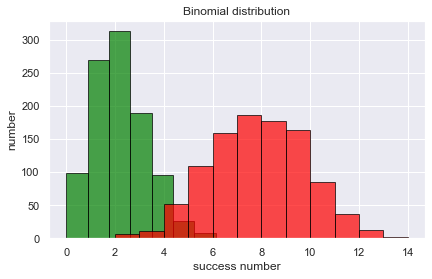

In [1481]:
plt.hist(binomial_distribution_1, color="green", edgecolor='black', bins=8, alpha=0.7)
plt.hist(binomial_distribution_2, color="red", edgecolor='black', bins=12, alpha=0.7)
plt.xlabel('success number')
plt.ylabel('number')
plt.title('Binomial distribution')

**泊松分布**
* 泊松分布的期望和方差均等于λ
* 当p<0.05，n>20时可以用泊松分布近似二项分布
* 当λ>=5时，可以用正态分布近似泊松分布

In [1529]:
poisoon_distribution_1 = np.random.poisson(lam=2, size=1000)  # lam:区间的期望
poisoon_distribution_2 = np.random.poisson(lam=20, size=1000)  # lam:区间的期望
binomial_distribution = np.random.binomial(n=50, p=0.04, size=1000)

In [1532]:
print('mean = ', poisoon_distribution_1.mean())
print('var = ', poisoon_distribution_1.var())

mean =  2.054
var =  2.047084


In [1525]:
stats.kstest(poisoon_distribution_2, 'norm', (poisoon_distribution_2.mean(), poisoon_distribution_2.std()))

KstestResult(statistic=0.06349909789018382, pvalue=0.0005997779288900098)

(array([139., 238., 294., 202.,  79.,  33.,  10.,   5.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 8 Patch objects>)

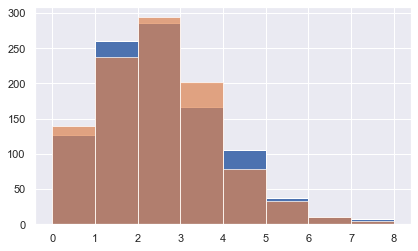

In [1531]:
plt.hist(poisoon_distribution_1, bins=8)
plt.hist(binomial_distribution, bins=8, alpha=0.7)

Text(0, 0.5, 'number')

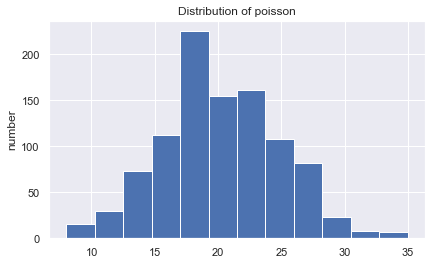

In [1541]:
plt.hist(poisoon_distribution_2, bins=12)
plt.title('Distribution of poisson')
plt.ylabel('number')

### 2.3 连续型随机变量

**指数分布**  
* 指数分布的期望E(X)=1/λ，方差Var(X)=(1/λ)<sup>2</sup>
* 指数分布是泊松分布的时间间隔

某公交站，每小时平均停靠4辆车，求1）每小时至少停靠3辆车的概率，2）到达车站后，15分钟内来一辆车的概率

In [1578]:
expo_distribution = np.random.exponential(scale=0.25, size=1000)  # scale:1/λ
poisson_distribution = np.random.poisson(lam=4, size=1000)

In [1585]:
print('mean = ', expo_distribution.mean())
print('var = ', expo_distribution.var())

mean =  0.260283237591061
var =  0.06944363188891588


Text(0.5, 1.0, 'Poisson distribution')

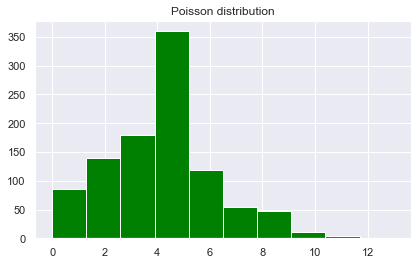

In [1579]:
plt.hist(poisson_distribution, bins=10, color="green")
plt.title('Poisson distribution')

In [1581]:
p = (poisson_distribution <= 4).sum() / 1000
p

0.595

Text(0.5, 1.0, 'Exponential distribution')

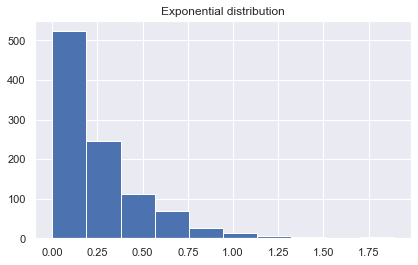

In [1582]:
plt.hist(expo_distribution)
plt.title('Exponential distribution')

In [1583]:
p = (expo_distribution <= 0.25).sum() / 1000
p

0.606

**正态分布**  
* 方差越大正态分布曲线越平缓

In [1648]:
norm_distribution_1 = np.random.normal(0, 1, size=1000)
norm_distribution_2 = np.random.normal(0, 1.5, size=1000)
norm_distribution_3 = np.random.normal(6, 1, size=1000)

(array([  4.,  22.,  46., 121., 229., 237., 203.,  93.,  38.,   7.]),
 array([2.81969621, 3.42856901, 4.03744181, 4.64631461, 5.25518741,
        5.8640602 , 6.472933  , 7.0818058 , 7.6906786 , 8.29955139,
        8.90842419]),
 <a list of 10 Patch objects>)

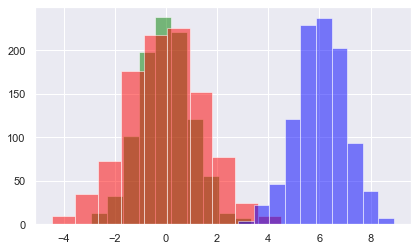

In [1649]:
plt.hist(norm_distribution_1, color="green", alpha=0.5)
plt.hist(norm_distribution_2, color="red", alpha=0.5)
plt.hist(norm_distribution_3, color="blue", alpha=0.5)

## 3 抽样理论

In [1271]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import random
np.random.seed(0)

**正态总体**

In [1043]:
norm_total = Series(np.random.normal(0, 1, size=1000))  # 正态分布总体（μ=0，σ=1）
stats.kstest(norm_total, 'norm', (norm_total.mean(), norm_total.std()))

KstestResult(statistic=0.013350162761963325, pvalue=0.9941469522578733)

In [1044]:
print('mean = ', norm_total.mean())
print('std = ', norm_total.std())

mean =  0.004482460640967098
std =  1.0513465138943707


Text(0, 0.5, 'number')

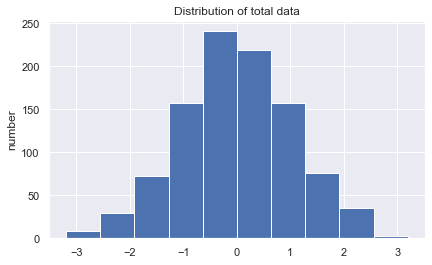

In [1045]:
plt.hist(norm_total)
plt.title('Distribution of total data')
plt.ylabel('number')

**非正态总体**

In [1046]:
non_norm_total = Series(np.random.rand(1000))

In [1047]:
print('mean = ', non_norm_total.mean())
print('std = ', non_norm_total.std())

mean =  0.5098216456176025
std =  0.29114396685874894


Text(0, 0.5, 'number')

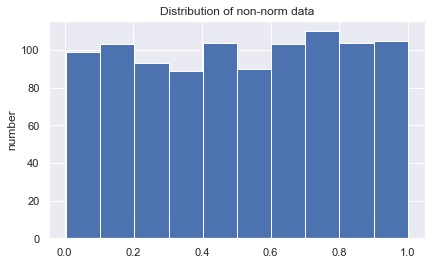

In [1048]:
plt.hist(non_norm_total)
plt.title('Distribution of non-norm data')
plt.ylabel('number')

### 3.1 样本均值的抽样分布
中心极限定理：**不论**总体服从什么分布，**只要**总体的均值和方差存在，且样本量足够大(n≥30)，则样本的均值抽样分布服从**正态分布**。且样本均值抽样分布的期望等于总体均值（E(X)=μ），方差等于总体方差除以样本量（Var(X)=σ<sup>2</sup>/n）

In [1078]:
from scipy import stats
np.random.seed(0)

**正态总体-大样本**  
样本均值抽样分布的期望等于总体均值（E(X)=μ），方差等于总体方差除以样本量（Var(X)=σ<sup>2</sup>/n）

In [1685]:
# 随机抽样
large_norm_samples = []

for i in range(1000):
    large_norm_samples.append(norm_total.sample(200, replace=True).values)

large_norm_samples = DataFrame(large_norm_samples)
large_norm_samples.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.542039,-0.728191,-0.000440,-0.270018,0.476217,-1.162305,0.809765,0.082280,0.539259,-1.235341,...,1.009322,-0.041676,0.160405,-1.481897,0.079019,0.915848,0.377203,-0.320374,-0.166465,-0.159705
1,1.197458,-0.600254,2.373032,1.325448,-1.139298,-1.008165,-2.073245,-1.156290,-0.513834,0.698238,...,-0.058764,1.197458,1.242226,0.310802,-0.588137,-0.765251,-0.903939,0.421094,-0.648647,-1.741523
2,0.396555,1.010973,0.762064,0.267646,1.274028,-0.418793,-0.133238,-0.254140,-1.234445,-0.416069,...,0.225312,1.068790,1.705449,1.902502,-1.329861,-0.827703,0.178550,0.373189,0.128845,-0.843276
3,0.377203,0.376113,0.405621,0.250635,-1.066161,0.972806,-0.971068,-1.827808,0.159333,-0.123176,...,1.010973,0.557836,1.631785,0.980082,0.410470,-0.600254,-0.345134,-0.167032,-1.481897,0.837526
4,-0.148900,-1.536260,-0.208494,-0.575703,1.656218,1.226982,-1.274046,0.239913,-1.347583,0.781977,...,-1.284966,1.551131,-1.034626,-0.761486,0.354630,-1.392522,-0.798835,-0.516503,-0.730922,-0.683953


In [1686]:
'''
正态性检验
H0：数据服从正态分布
H1：数据不服从正态分布
p>0.5，不能拒绝原假设
'''
large_norm_sample_means = DataFrame(large_norm_samples).mean(axis=1)
stats.kstest(large_norm_sample_means, 'norm', (large_norm_sample_means.mean(), large_norm_sample_means.std()))

KstestResult(statistic=0.016138846015380515, pvalue=0.956932739131344)

In [1687]:
print('mean = ', large_norm_sample_means.mean())
print('var = ', large_norm_sample_means.var())

mean =  -0.009268059520311718
var =  0.005202554521245628


Text(0, 0.5, 'number')

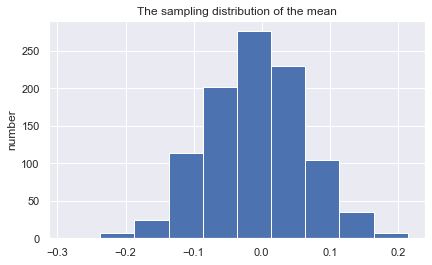

In [1688]:
plt.hist(large_norm_sample_means)
plt.title('The sampling distribution of the mean')
plt.ylabel('number')

**正态总体-小样本**  
* 样本均值抽样分布的期望等于总体均值（E(X)=μ），相对于大样本，**方差偏大**
* 多次重复采样取均值能够降低误差

In [1689]:
# 随机抽样
small_norm_samples = []

for i in range(1000):
    small_norm_samples.append(norm_total.sample(15, replace=True).values)

small_norm_samples = DataFrame(small_norm_samples)
small_norm_samples.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.374977,0.802651,-0.148900,-0.683953,0.066315,0.067817,-0.169852,-0.362312,-0.608349,-1.108556,-0.345134,-0.111811,-0.972176,0.872939,0.562419
1,-0.320374,-1.779981,-1.053191,-1.179077,-0.614422,-0.035903,-0.578365,0.876640,-0.437332,-1.046007,0.131043,-0.839696,-1.097925,-1.235341,-0.695731
2,-0.188073,1.433712,-0.947441,-1.235341,1.619121,-0.798835,0.417583,0.436779,0.507854,-0.220820,-0.201354,-0.644074,0.847950,0.354630,-0.400208
3,-1.675860,0.118408,0.499907,0.156038,0.692731,-0.130300,-0.341010,1.162450,-0.150714,0.272816,0.118408,1.033827,-0.089827,-1.364988,-1.450489
4,-0.120144,0.272816,0.821364,0.175411,0.367683,-0.020823,0.392160,0.368092,-1.256110,1.761604,0.426558,-1.244028,1.612561,-0.165514,-0.376919


In [1690]:
small_norm_sample_means = DataFrame(small_norm_samples).mean(axis=1)
stats.kstest(small_norm_sample_means, 'norm', (small_norm_sample_means.mean(), small_norm_sample_means.std()))

KstestResult(statistic=0.021911548315446006, pvalue=0.7230134720986916)

In [1691]:
print('mean = ', small_norm_sample_means.mean())
print('std = ', small_norm_sample_means.std())

mean =  -0.017837883187005667
std =  0.24937012015439725


Text(0.5, 0, 'mean')

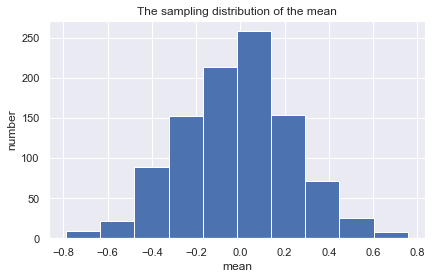

In [1692]:
plt.hist(small_norm_sample_means)
plt.title('The sampling distribution of the mean')
plt.ylabel('number')
plt.xlabel('mean')

多次抽样

In [1693]:
def getMA(arr, step=3):
    '''
    取移动平均值
    '''
    result = []
    
    for i in range(0, len(arr)-step+1, step):
        temp = 0
        for j in range(step):
            temp += arr[i+j]
        ma = temp / step
        result.append(ma)
        
    return Series(result)

In [1694]:
MAs = getMA(small_norm_sample_means)
stats.kstest(MAs, 'norm', (MAs.mean(), MAs.std()))

KstestResult(statistic=0.033681270028089405, pvalue=0.8443448000059879)

Text(0.5, 0, 'mean')

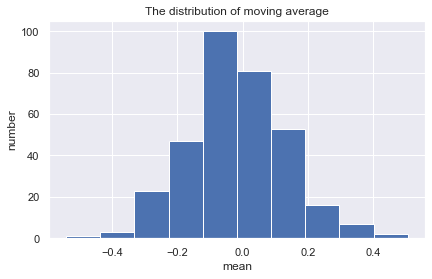

In [1695]:
plt.hist(MAs)
plt.title('The distribution of moving average')
plt.ylabel('number')
plt.xlabel('mean')

**非正态总体-大样本**  
样本均值抽样分布的期望等于总体均值（E(X)=μ），方差等于总体方差除以样本量（Var(X)=σ<sup>2</sup>/n）

In [1696]:
# 随机抽样
large_non_norm_samples = []

for i in range(1000):
    large_non_norm_samples.append(non_norm_total.sample(200, replace=True).values)

large_non_norm_samples = DataFrame(large_non_norm_samples)
large_non_norm_samples.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.628235,0.759991,0.043031,0.009896,0.163444,0.117227,0.901623,0.249698,0.665684,0.658633,...,0.088299,0.385635,0.417751,0.933089,0.256373,0.428877,0.970094,0.012424,0.734409,0.606734
1,0.801562,0.328601,0.881533,0.490199,0.496635,0.853469,0.129476,0.125276,0.365990,0.575404,...,0.706938,0.728196,0.463753,0.099644,0.853579,0.428877,0.803000,0.518651,0.799294,0.144352
2,0.353943,0.502602,0.212001,0.411186,0.891994,0.340603,0.390655,0.559744,0.494843,0.249883,...,0.732423,0.099644,0.979332,0.911979,0.041708,0.833954,0.363641,0.002084,0.655067,0.618857
3,0.990178,0.104082,0.647966,0.743288,0.128401,0.061928,0.489594,0.567320,0.285921,0.626054,...,0.734555,0.490927,0.734409,0.120085,0.267857,0.292451,0.430621,0.940812,0.327436,0.637082
4,0.027152,0.087036,0.494842,0.102196,0.440673,0.847642,0.738654,0.768455,0.627299,0.367845,...,0.157984,0.813371,0.401474,0.640117,0.933089,0.850137,0.683848,0.037034,0.403771,0.863161


In [1697]:
large_non_norm_sample_means = DataFrame(large_non_norm_samples).mean(axis=1)
stats.kstest(large_non_norm_sample_means, 'norm', (large_non_norm_sample_means.mean(), large_non_norm_sample_means.std()))

KstestResult(statistic=0.018377202106908186, pvalue=0.8882292821106321)

In [1698]:
print('mean = ', large_non_norm_sample_means.mean())
print('std = ', large_non_norm_sample_means.std())

mean =  0.4906127031785294
std =  0.020522440927273785


Text(0, 0.5, 'number')

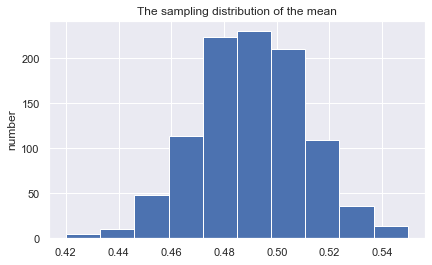

In [1699]:
plt.hist(large_non_norm_sample_means)
plt.title('The sampling distribution of the mean')
plt.ylabel('number')

**非正态总体-小样本**  
样本均值抽样分布的期望等于总体均值（E(X)=μ），相对于大样本，**方差偏大**

In [1700]:
# 随机抽样
small_non_norm_samples = []

for i in range(1000):
    small_non_norm_samples.append(non_norm_total.sample(15, replace=True).values)

small_non_norm_samples = DataFrame(small_non_norm_samples)
small_non_norm_samples.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.933089,0.340687,0.147159,0.129993,0.035759,0.401474,0.077372,0.149887,0.046049,0.662766,0.268358,0.969250,0.396721,0.668828,0.466204
1,0.651837,0.149329,0.160373,0.099496,0.046049,0.963046,0.801562,0.318203,0.043031,0.798933,0.507460,0.076727,0.157337,0.118956,0.163444
2,0.794970,0.698268,0.122538,0.166878,0.094453,0.707646,0.366479,0.099496,0.882579,0.256373,0.385906,0.376787,0.264091,0.941097,0.514971
3,0.076739,0.874307,0.367027,0.496635,0.853469,0.149887,0.627794,0.062216,0.095508,0.267857,0.385635,0.520403,0.367938,0.025377,0.176371
4,0.818264,0.965105,0.932645,0.062535,0.102196,0.692091,0.475436,0.396948,0.276455,0.103030,0.383432,0.966730,0.751310,0.588982,0.731577


In [1701]:
small_non_norm_sample_means = DataFrame(small_non_norm_samples).mean(axis=1)
stats.kstest(small_non_norm_sample_means, 'norm', (small_non_norm_sample_means.mean(), small_non_norm_sample_means.std()))

KstestResult(statistic=0.017110314322451747, pvalue=0.9314956494506456)

In [1702]:
print('mean = ', small_non_norm_sample_means.mean())
print('std = ', small_non_norm_sample_means.std())

mean =  0.48694531244877143
std =  0.07386109257523561


Text(0, 0.5, 'number')

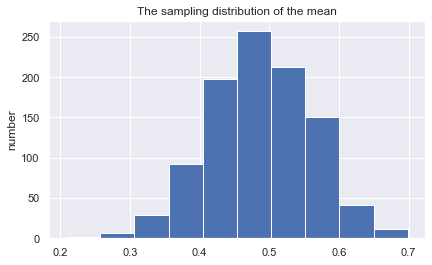

In [1703]:
plt.hist(small_non_norm_sample_means)
plt.title('The sampling distribution of the mean')
plt.ylabel('number')

## 3.2 样本比例的抽样分布
当n足够大时，根据二项分布的原理和渐进分布的原理可知，p的分布服从均值为π，方差为π(1-π)/n的正态分布

In [1704]:
pi = (norm_total <= -0.5).sum() / 1000  # 总体比例
pi

0.315

**大样本**  
样本比例抽样分布的期望E(X)=π，Var(X)=π(1-π)/n

In [1705]:
large_sample_ps = (large_norm_samples <= -0.5).sum(axis=1) / 200  # 样本比例
stats.kstest(large_sample_ps, 'norm', (large_sample_ps.mean(), large_sample_ps.std()))

KstestResult(statistic=0.047935269661664504, pvalue=0.019531313358425912)

In [1706]:
print('mean = ', large_sample_ps.mean())
print('std = ', large_sample_ps.std())

mean =  0.31474500000000044
std =  0.03319355037935524


Text(0, 0.5, 'number')

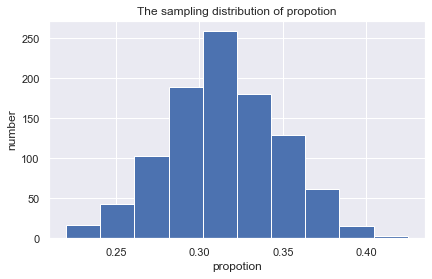

In [1707]:
plt.hist(large_sample_ps)
plt.title('The sampling distribution of propotion')
plt.xlabel('propotion')
plt.ylabel('number')

**小样本**  
样本比例抽样分布的期望E(X)=π，相对于大样本，方差偏大

In [1708]:
small_sample_ps = (small_norm_samples <= -0.5).sum(axis=1) / 15  # 样本比例
stats.kstest(small_sample_ps, 'norm', (small_sample_ps.mean(), small_sample_ps.std()))

KstestResult(statistic=0.12955518972466212, pvalue=4.293910837462409e-15)

In [1709]:
print('mean = ', small_sample_ps.mean())
print('std = ', small_sample_ps.std())

mean =  0.31886666666666524
std =  0.11751156951112884


Text(0, 0.5, 'number')

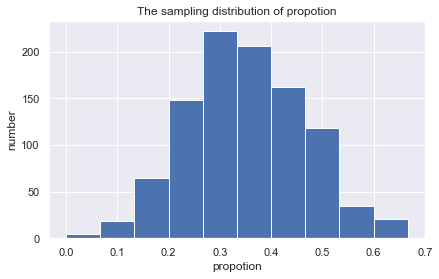

In [1710]:
plt.hist(small_sample_ps)
plt.title('The sampling distribution of propotion')
plt.xlabel('propotion')
plt.ylabel('number')

## 3.3 样本方差的抽样分布
若样本X1,X2,...Xn来自于正态分布总体，则样本方差服从自由度为样本量减一的卡方分布(n-1)S<sup>2</sup>/σ<sup>2</sup>~χ<sup>2</sup>(n-1)  
χ<sup>2</sup>分布E(X)=n，Var(X)=2n  
χ<sup>2</sup>分布自由度越大越接近于正态分布

In [1711]:
chis = 14 * small_norm_samples.var(axis=1) / norm_total.var()

In [1712]:
print('mean = ', chis.mean())
print('var = ', chis.var())

mean =  14.167557510016506
var =  28.888454117988697


Text(0, 0.5, 'number')

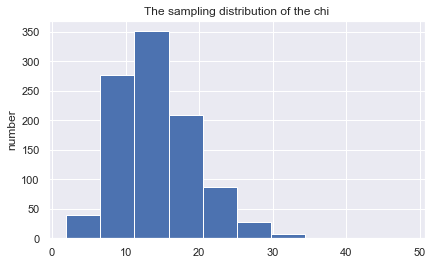

In [1713]:
plt.hist(chis)
plt.title('The sampling distribution of the chi')
plt.ylabel('number')

## 3.4 样本方差比的抽样分布
若样本X1,X2,...Xn以及Y1,Y2,...Yn分别来自于两个正态分布总体，且X、Y相互独立，则(S<sub>x</sub><sup>2</sup>/σ<sub>x</sub><sup>2</sup>)/(S<sub>y</sub><sup>2</sup>/σ<sub>y</sub><sup>2</sup>)~F(n<sub>x</sub>-1, n<sub>y</sub>-1)  
F(m, n)分布E(X)=n/n-2(n>2),D(X)=(2n<sup>2</sup>×(m+n-2))/(m(n-2)<sup>2</sup>×(n-4))(n>4)

In [1717]:
# 构建一个新的正态总体
norm_total1 = Series(np.random.normal(0, 1, size=1000))  # 正态分布总体（μ=0，σ=1）
stats.kstest(norm_total1, 'norm', (norm_total1.mean(), norm_total1.std()))

KstestResult(statistic=0.019333315546699925, pvalue=0.8488746162849157)

In [1718]:
print('mean = ', norm_total1.mean())
print('std = ', norm_total1.std())

mean =  -0.018065953626926538
std =  0.9783415223282768


Text(0, 0.5, 'number')

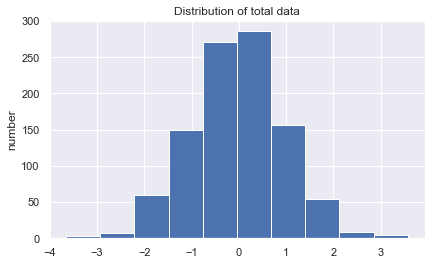

In [1719]:
plt.hist(norm_total1)
plt.title('Distribution of total data')
plt.ylabel('number')

In [1720]:
# 随机抽样
small_norm_samples1 = []

for i in range(1000):
    small_norm_samples1.append(norm_total1.sample(20).values)

small_norm_samples1 = DataFrame(small_norm_samples1)
small_norm_samples1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.443514,0.425573,0.955339,0.871140,1.383448,0.960531,-0.996204,-1.177200,1.493805,-0.857352,-0.591697,0.005001,0.608866,0.371816,-0.857297,0.629913,-0.583451,0.310519,-0.068004,0.286538
1,-0.225004,0.340141,0.061925,1.282299,-0.711816,1.105160,-0.059799,-0.934207,1.606551,0.185124,-0.857297,-0.182019,-0.797719,-0.757847,1.150791,1.883837,0.435404,-1.453066,-3.116930,-0.189684
2,1.384307,0.871140,1.747952,-0.043909,1.282299,0.975143,-0.815992,-1.493950,-0.021020,-0.560665,0.428884,1.257044,-0.141914,0.046432,-0.081481,-0.298422,0.777346,-1.179787,-0.460303,0.910441
3,-0.338611,-0.565043,0.707815,-1.267092,2.090088,-0.384967,0.301590,0.621483,0.198407,-1.659100,-0.318506,-0.462883,0.737972,-0.790542,1.181355,-0.840847,0.275200,-1.507455,0.270461,1.384307
4,-0.880585,-1.659100,0.253515,-0.206669,-0.560665,-1.625978,0.447960,-1.137815,0.980962,-1.396582,-0.238731,-0.629610,0.643521,-0.260294,-0.337523,1.352023,-2.039987,-0.314055,-2.026158,0.670707


In [1723]:
Fs = (small_norm_samples1.var(axis=1) / norm_total1.var()) / (small_norm_samples.var(axis=1) / norm_total.var())  # F(19, 14)

In [1724]:
print('mean = ', Fs.mean())
print('var = ', Fs.var())

mean =  1.1778498338973276
var =  0.448467374670366


Text(0.5, 1.0, 'Distribution of F')

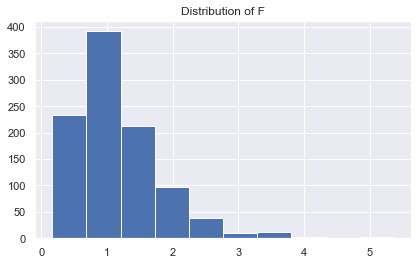

In [1725]:
plt.hist(Fs)
plt.title('Distribution of F')

## 4 参数估计
根据样本信息来推断总体参数

In [1755]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import random
np.random.seed(0)

**正态总体**

In [1726]:
norm_total = Series(np.random.normal(0, 1, size=1000))  # 正态分布总体（μ=0，σ=1）
stats.kstest(norm_total, 'norm', (norm_total.mean(), norm_total.std()))

KstestResult(statistic=0.015404579091833792, pvalue=0.9715819888034268)

In [1727]:
print('mean = ', norm_total.mean())
print('std = ', norm_total.std())

mean =  -0.005675573070433379
std =  0.9803267901701055


Text(0, 0.5, 'number')

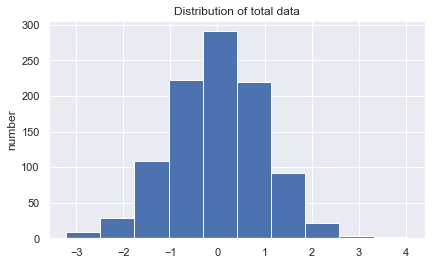

In [1728]:
plt.hist(norm_total)
plt.title('Distribution of total data')
plt.ylabel('number')

In [1730]:
# 随机抽样
large_norm_samples = []
small_norm_samples = []

for i in range(1000):
    large_norm_samples.append(norm_total.sample(200, replace=True).values)
    small_norm_samples.append(norm_total.sample(15, replace=True).values)

large_norm_samples = DataFrame(large_norm_samples)
small_norm_samples = DataFrame(small_norm_samples)

**非正态总体**

In [1731]:
non_norm_total = Series(np.random.rand(1000))

In [1732]:
print('mean = ', non_norm_total.mean())
print('std = ', non_norm_total.std())

mean =  0.4892216471970835
std =  0.29242055819631535


Text(0, 0.5, 'number')

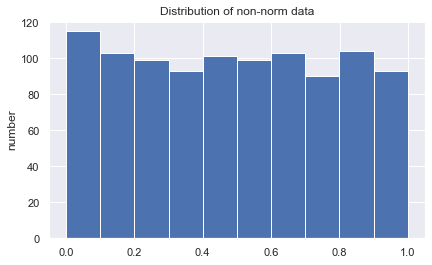

In [1733]:
plt.hist(non_norm_total)
plt.title('Distribution of non-norm data')
plt.ylabel('number')

In [1734]:
# 随机抽样
large_non_norm_samples = []
small_non_norm_samples = []

for i in range(1000):
    large_non_norm_samples.append(non_norm_total.sample(200, replace=True).values)
    small_non_norm_samples.append(non_norm_total.sample(15, replace=True).values)

large_non_norm_samples = DataFrame(large_non_norm_samples)
small_non_norm_samples = DataFrame(small_non_norm_samples)

## 4.1 Bootstrap方法
详解：https://zhuanlan.zhihu.com/p/41099219

In [1874]:
small_sample = small_non_norm_samples.loc[100]

In [1875]:
# 自抽样
small_samples = []

for i in range(1000):
    small_samples.append(small_sample.sample(10, replace=True).values)

small_samples = DataFrame(small_samples)

In [1881]:
small_sample_means = small_samples.mean(axis=1)
small_sample_vars = small_samples.var(axis=1)

**均值**

In [1877]:
err = 2.1448*small_sample.std()/math.sqrt(15)

print('均值：', small_sample.mean())
print('95%置信区间(Bootstrap)：', '[', small_sample_means.quantile(0.025), ', ', small_sample_means.quantile(0.975), ']')
print('95%置信区间:', '[', small_sample.mean()-err, ', ', small_sample.mean()+err, ']')

均值： 0.479177596221996
95%置信区间(Bootstrap)： [ 0.33554518252861626 ,  0.648155203547846 ]
95%置信区间: [ 0.3365870123237671 ,  0.621768180120225 ]


Text(0, 0.5, 'number')

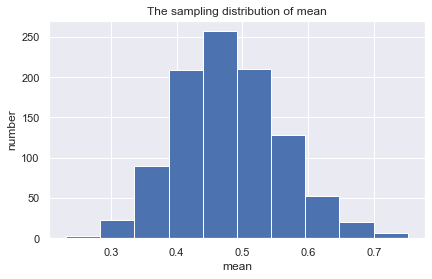

In [1878]:
plt.hist(small_sample_means)
plt.title('The sampling distribution of mean')
plt.xlabel('mean')
plt.ylabel('number')

**方差**

In [1886]:
print('方差：', small_sample.var())
print('95%置信区间(Bootstrap)：', '[', small_sample_vars.quantile(0.025), ', ', small_sample_vars.quantile(0.975), ']')
print('95%置信区间：', '[', 14*small_sample.var()/26.1189, ', ', 14*small_sample.var()/5.6287, ']')

方差： 0.06629783583827596
95%置信区间(Bootstrap)： [ 0.013315860545125062 ,  0.10838809654048065 ]
95%置信区间： [ 0.0355363243373903 ,  0.1648994797619101 ]


Text(0, 0.5, 'number')

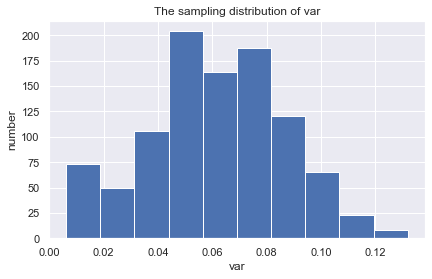

In [1887]:
plt.hist(small_sample_vars)
plt.title('The sampling distribution of var')
plt.xlabel('var')
plt.ylabel('number')

## 4.1 均值

### 4.11 总体服从正态
* 对于大样本而言，相同置信度下，使用z统计量误差较小,但是抽取到不包含均值的样本概率增大
* 对于小样本而言，相同置信度下，使用t统计量误差虽然增大，但是抽取到不包含均值的样本概率减小
* 一般而言，对于大样本使用z统计量；对于小样本使用t统计量

In [1657]:
import math

In [922]:
total_std = total.std()    # 总体标准差
total_std

0.9957063024858961

In [940]:
# 样本均值
large_sample_means = DataFrame(large_samples).mean(axis=1)  
small_sample_means = DataFrame(small_samples).mean(axis=1)

In [998]:
# 样本标准差
large_sample_stds = DataFrame(large_samples).std(axis=1) 
small_sample_stds = DataFrame(small_samples).std(axis=1)

**大样本且已知总体σ**  

z统计量

In [924]:
err = 1.96*total_std/math.sqrt(50)
print('err = ', err)

err =  0.2759957059947206


In [925]:
Theta_L = large_sample_means - err  # 95%置信区间下限
Theta_U = large_sample_means + err  # 95%置信区间上限

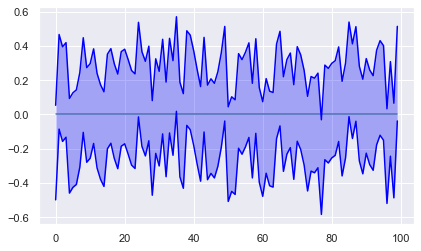

In [926]:
plt.plot(np.zeros(100))
plt.plot(np.arange(100), Theta_L[:100], Theta_U[:100], color="blue")
plt.fill_between(np.arange(100), Theta_L[:100], Theta_U[:100], facecolor="blue", alpha=0.3)

In [927]:
p = ((Theta_U < 0) | (Theta_L > 0)).sum() / 1000  # 抽取到不包含均值的样本概率
p

0.037

t统计量

In [928]:
err = 2.2622*total_std/math.sqrt(50)
print('err = ', err)

err =  0.31854973780676377


In [929]:
Theta_L1 = large_sample_means - err  # 95%置信区间下限
Theta_U1 = large_sample_means + err  # 95%置信区间上限

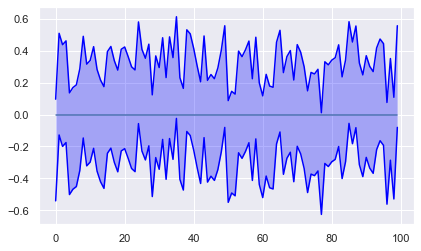

In [930]:
plt.plot(np.zeros(100))
plt.plot(np.arange(100), Theta_L1[:100], Theta_U1[:100], color="blue")
plt.fill_between(np.arange(100), Theta_L1[:100], Theta_U1[:100], facecolor="blue", alpha=0.3)

In [931]:
p = ((Theta_U1< 0) | (Theta_L1 > 0)).sum() / 1000
p

0.015

**大样本且总体未知σ**  

z统计量

In [1000]:
err = 1.96*large_sample_stds/math.sqrt(50)
err.mean()

0.27424244765252154

In [1001]:
Theta_L = large_sample_means - err  # 95%置信区间下限
Theta_U = large_sample_means + err  # 95%置信区间上限

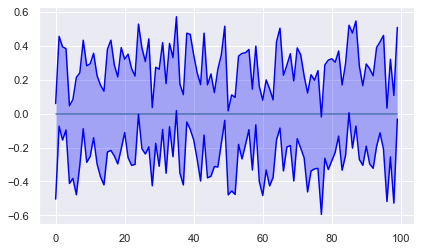

In [1002]:
plt.plot(np.zeros(100))
plt.plot(np.arange(100), Theta_L[:100], Theta_U[:100], color="blue")
plt.fill_between(np.arange(100), Theta_L[:100], Theta_U[:100], facecolor="blue", alpha=0.3)

In [1003]:
p = ((Theta_U < 0) | (Theta_L > 0)).sum() / 1000  # 抽取到不包含均值的样本概率
p

0.042

**小样本且已知总体σ**

t统计量

In [932]:
err = 2.2622*total_std/math.sqrt(10)
print('err = ', err)

err =  0.7122988679506586


In [933]:
STheta_L = small_sample_means - err  # 95%置信区间下限
STheta_U = small_sample_means + err  # 95%置信区间上限

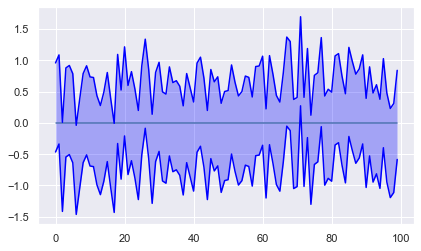

In [934]:
plt.plot(np.zeros(100))
plt.plot(np.arange(100), STheta_L[:100], STheta_U[:100], color="blue")
plt.fill_between(np.arange(100), STheta_L[:100], STheta_U[:100], facecolor="blue", alpha=0.3)

In [935]:
p = ((STheta_U < 0) | (STheta_L > 0)).sum() / 1000
p

0.025

**小样本且总体σ未知**

t统计量

In [942]:
err = 2.2622*small_sample_stds/math.sqrt(10)
err.mean()

0.6928995405172267

In [943]:
STheta_L = small_sample_means - err  # 95%置信区间下限
STheta_U = small_sample_means + err  # 95%置信区间上限

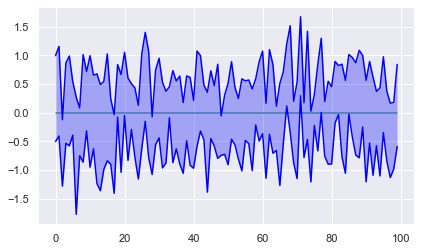

In [944]:
plt.plot(np.zeros(100))
plt.plot(np.arange(100), STheta_L[:100], STheta_U[:100], color="blue")
plt.fill_between(np.arange(100), STheta_L[:100], STheta_U[:100], facecolor="blue", alpha=0.3)

In [945]:
p = ((STheta_U < 0) | (STheta_L > 0)).sum() / 1000
p

0.048

### 4.12 总体不服从正态

In [950]:
non_norm_total_std = non_norm_total.std()
non_norm_total_std

0.2866933601455485

In [952]:
# 样本均值
large_nsample_means = DataFrame(large_nsamples).mean(axis=1)
small_nsample_means = DataFrame(small_nsamples).mean(axis=1)

**大样本且总体σ已知**

z统计量

In [994]:
err = 1.96*non_norm_total_std/math.sqrt(50)
err.mean()

0.07946734507938918

In [995]:
Theta_L = large_nsample_means - err  # 95%置信区间下限
Theta_U = large_nsample_means + err  # 95%置信区间上限

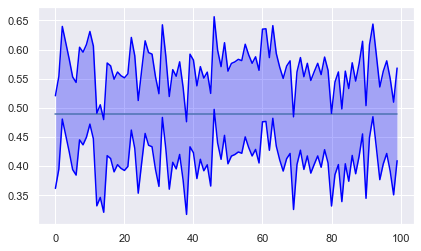

In [996]:
plt.plot(np.zeros(100)+0.49)
plt.plot(np.arange(100), Theta_L[:100], Theta_U[:100], color="blue")
plt.fill_between(np.arange(100), Theta_L[:100], Theta_U[:100], facecolor="blue", alpha=0.3)

In [997]:
p = ((Theta_U < 0.49) | (Theta_L > 0.49)).sum() / 1000
p

0.052

**大样本且总体σ未知**

z统计量

In [961]:
large_nsample_stds = DataFrame(large_nsamples).std(axis=1)

In [962]:
err = 1.96*large_nsample_stds/math.sqrt(50)
err.mean()

0.07940186074342

In [963]:
Theta_L = large_nsample_means - err  # 95%置信区间下限
Theta_U = large_nsample_means + err  # 95%置信区间上限

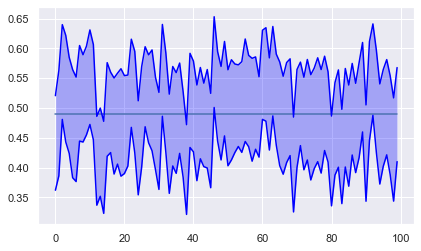

In [964]:
plt.plot(np.zeros(100)+0.49)
plt.plot(np.arange(100), Theta_L[:100], Theta_U[:100], color="blue")
plt.fill_between(np.arange(100), Theta_L[:100], Theta_U[:100], facecolor="blue", alpha=0.3)

In [965]:
p = ((Theta_U < 0.49) | (Theta_L > 0.49)).sum() / 1000
p

0.058

**小样本**